# Wordcloud

In [2]:
#!pip install pyspark
#!pip install wordcloud
import numpy as np
import pandas as pd
from pyspark.sql import HiveContext
from pyspark import SparkContext
#hive_context = HiveContext(sc)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append(os.getcwd())


In [3]:
os.getcwd()

'/home/jupyter/w266_project_topmusichits/notebooks'

In [4]:
# import os
# for f in os.listdir("/home/jupyter/w266_project_topmusichits/data/interim"):
# 	print(f)

In [5]:
song_charts = pd.read_csv("songs_charts.csv")

In [6]:
song_charts.head()

,Unnamed: 0,track_name,track_artist,lyrics,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,...,instrumentalness,liveness,valence,tempo,duration_ms,language,song_year,trending_year,Weeks_On_Chart,Hit
0,1,i feel alive,steady rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,Hard Rock Workout,rock,hard rock,0.303,...,0.00994,0.3470,0.404,135.225,373512,en,2017,NaN,0.0,0
1,2,poison,bell biv devoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,0.00723,0.4890,0.650,111.904,262467,en,2005,1990.0,22.0,1
2,3,baby it's cold outside (feat. christina aguilera),ceelo green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,Christmas Soul,r&b,neo soul,0.425,...,0.00000,0.0664,0.405,118.593,243067,en,2012,NaN,0.0,0
3,4,dumb litty,kard,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,K-Party Dance Mix,pop,dance pop,0.760,...,0.00000,0.1380,0.240,130.018,193160,en,2019,NaN,0.0,0
4,5,soldier,james tw,"Hold your breath, don't look down, keep trying...",70,Chapters,urban contemporary,r&b,urban contemporary,0.496,...,0.00000,0.0975,0.305,147.764,224720,en,2019,NaN,0.0,0


In [7]:
song_charts.shape

(13747, 26)

In [8]:
song_charts.dtypes

Unnamed: 0             int64
track_name            object
track_artist          object
lyrics                object
track_popularity       int64
track_album_name      object
playlist_name         object
playlist_genre        object
playlist_subgenre     object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
language              object
song_year              int64
trending_year        float64
Weeks_On_Chart       float64
Hit                    int64
dtype: object

In [9]:
df_lyrics = song_charts[song_charts['lyrics'].notnull()]
df_lyrics.shape

(13747, 26)

In [10]:
df_lyrics.playlist_genre.value_counts()

pop      3541
r&b      2927
rock     2456
rap      2359
edm      1637
latin     827
Name: playlist_genre, dtype: int64

In [11]:
df_lyrics.song_year.value_counts()

2019    2362
2018    1209
2017    1123
2016    1053
2015     897
2014     712
2013     482
2012     399
2011     352
2008     346
2005     298
2010     289
2009     252
2007     249
2006     238
2004     235
2001     210
2003     208
2020     190
2000     171
1999     168
1994     167
1998     165
1996     163
2002     161
1995     152
1993     150
1997     148
1991     146
1987     118
1988     117
1992     115
1990      98
1989      90
1985      90
1986      84
1984      73
1982      73
1983      70
1980      67
1981      57
Name: song_year, dtype: int64

In [12]:
conditions = [
    df_lyrics['song_year']<=1984,
    (df_lyrics['song_year']>=1985) & (df_lyrics['song_year']<=1989),
    (df_lyrics['song_year']>=1990) & (df_lyrics['song_year']<=1994),
    (df_lyrics['song_year']>=1995) & (df_lyrics['song_year']<=1999),
    (df_lyrics['song_year']>=2000) & (df_lyrics['song_year']<=2004),
    (df_lyrics['song_year']>=2005) & (df_lyrics['song_year']<=2009),
    (df_lyrics['song_year']>=2010) & (df_lyrics['song_year']<=2015),
    (df_lyrics['song_year']>=2016) & (df_lyrics['song_year']<=2020)
]
choices = [
    '1981 - 1984', 
    '1985 - 1989',          
    '1990 - 1994',            
    '1995 - 1999',
    '2000 - 2004',    
    '2005 - 2009',        
    '2010 - 2014',      
    '2015 - 2020',      
          ]
df_lyrics['year_condensed'] = np.select(conditions, choices)

df_lyrics.year_condensed.value_counts()

2015 - 2020    5937
2010 - 2014    3131
2005 - 2009    1383
2000 - 2004     985
1995 - 1999     796
1990 - 1994     676
1985 - 1989     499
1981 - 1984     340
Name: year_condensed, dtype: int64

In [13]:
# One dataset per genre
df_lyrics_pop = df_lyrics[df_lyrics['playlist_genre'] == 'pop']
print(df_lyrics_pop.shape)
df_lyrics_r_b = df_lyrics[df_lyrics['playlist_genre'] == 'r&b']
print(df_lyrics_r_b.shape)
df_lyrics_rock = df_lyrics[df_lyrics['playlist_genre'] == 'rock']
print(df_lyrics_rock.shape)
df_lyrics_rap = df_lyrics[df_lyrics['playlist_genre'] == 'rap']
print(df_lyrics_rap.shape)
df_lyrics_edm = df_lyrics[df_lyrics['playlist_genre'] == 'edm']
print(df_lyrics_edm.shape)
df_lyrics_latin = df_lyrics[df_lyrics['playlist_genre'] == 'latin']
print(df_lyrics_latin.shape)

(3541, 27)
(2927, 27)
(2456, 27)
(2359, 27)
(1637, 27)
(827, 27)


In [48]:
#Random samples 10% stratified by year_condensed


df_lyrics_pop_s = df_lyrics_pop.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_pop_s.shape
df_lyrics_r_b_s = df_lyrics_r_b.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_r_b_s.shape
df_lyrics_rock_s = df_lyrics_rock.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_rock_s.shape
df_lyrics_rap_s = df_lyrics_rap.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_rap_s.shape
df_lyrics_edm_s = df_lyrics_edm.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_edm_s.shape
df_lyrics_latin_s = df_lyrics_latin.groupby('year_condensed', group_keys=False).apply(lambda x: x.sample(frac=0.05))
df_lyrics_latin_s.shape

(42, 27)

In [24]:
# One dataset per condensed dates

df_lyrics_8184 = df_lyrics[df_lyrics['year_condensed'] == '1981 - 1984']
print(df_lyrics_8184.shape)
df_lyrics_8589 = df_lyrics[df_lyrics['year_condensed'] == '1985 - 1989']
print(df_lyrics_8589.shape)
df_lyrics_9094 = df_lyrics[df_lyrics['year_condensed'] == '1990 - 1994']
print(df_lyrics_9094.shape)
df_lyrics_9599 = df_lyrics[df_lyrics['year_condensed'] == '1995 - 1999']
print(df_lyrics_9599.shape)
df_lyrics_0004 = df_lyrics[df_lyrics['year_condensed'] == '2000 - 2004']
print(df_lyrics_0004.shape)
df_lyrics_0509 = df_lyrics[df_lyrics['year_condensed'] == '2005 - 2009']
print(df_lyrics_0509.shape)
df_lyrics_1014 = df_lyrics[df_lyrics['year_condensed'] == '2010 - 2014']
print(df_lyrics_1014.shape)
df_lyrics_1520 = df_lyrics[df_lyrics['year_condensed'] == '2015 - 2020']
print(df_lyrics_1520.shape)

(340, 27)
(499, 27)
(676, 27)
(796, 27)
(985, 27)
(1383, 27)
(3131, 27)
(5937, 27)


### Libraries

In [25]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Pre-process the dataset to get a clened, normalized text corpus

In [87]:
dataset = df_lyrics_latin_s
datacol = 'lyrics'
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package omw-1.4 to /home/jupyter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [88]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    #Remove punctuation
    text = [re.sub('[^a-zA-Z]', ' ',i) for i in dataset[datacol]]

    #Convert to lowercase
    text = [word.lower() for word in text]

    #Remove tags
    text = [re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",i) for i in text]

    #Remove special characters and digits
    text = [re.sub("(\\d|\\W)+"," ",i) for i in text]

    #Stemming
    ps = PorterStemmer()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    corpus.append(text)

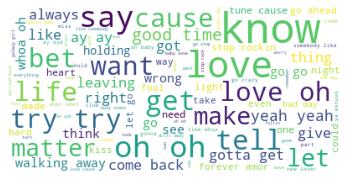

In [89]:
#Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                        background_color = 'white',
                        stopwords = stop_words,
                        max_words = 100,
                        max_font_size = 50,
                        random_state = 42
                        ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [90]:
#Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re 
cv = CountVectorizer(stop_words = stop_words, ngram_range = (1,3))
X = cv.fit_transform(corpus)

In [91]:
#Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['began',
 'begin',
 'knowin',
 'know',
 'growing',
 'strong',
 'spring',
 'became',
 'summer',
 'believed']

In [92]:
len(list(cv.vocabulary_.keys()))

8219

### Extract most frequently occuring keywords and n-grams

#### Unigrams

   Keyword  Frequency
0       oh       9786
1     love       8022
2       go       6720
3     know       5124
4     like       4032
5      get       4032
6    cause       3948
7     baby       3948
8      try       3780
9      let       3654
10    come       3024
11     say       2982
12    time       2940
13    yeah       2730
14    tell       2688
15    away       2520
16     one       2100
17     see       2058
18    life       2058
19    back       2016


[Text(0, 0, 'oh'),
 Text(1, 0, 'love'),
 Text(2, 0, 'go'),
 Text(3, 0, 'know'),
 Text(4, 0, 'like'),
 Text(5, 0, 'get'),
 Text(6, 0, 'cause'),
 Text(7, 0, 'baby'),
 Text(8, 0, 'try'),
 Text(9, 0, 'let'),
 Text(10, 0, 'come'),
 Text(11, 0, 'say'),
 Text(12, 0, 'time'),
 Text(13, 0, 'yeah'),
 Text(14, 0, 'tell'),
 Text(15, 0, 'away'),
 Text(16, 0, 'one'),
 Text(17, 0, 'see'),
 Text(18, 0, 'life'),
 Text(19, 0, 'back')]

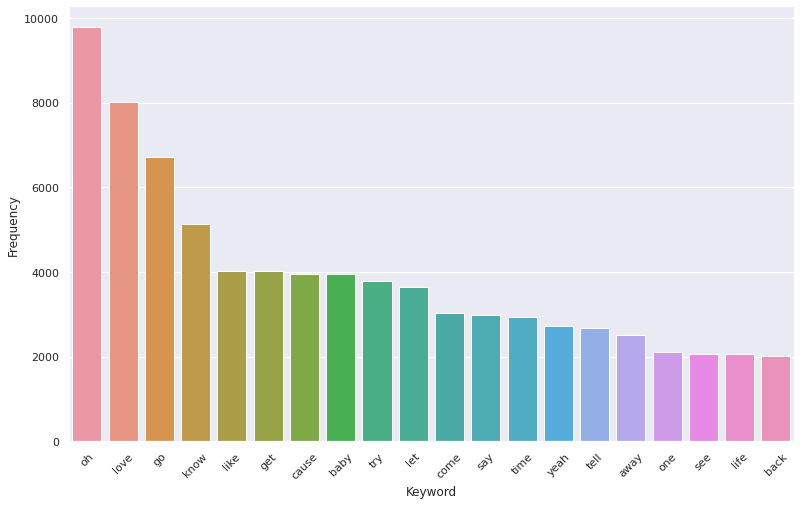

In [93]:
#View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                 vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1],
                       reverse = True)
    return words_freq[:n]
    
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Keyword", "Frequency"]
print(top_df)

#Barplot of most freq words
import seaborn as sns
sns.set(rc = {'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data = top_df)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)


#### Bigrams

         Bi-gram  Frequency
0          oh oh       2436
1        love oh       1722
2        try try       1680
3         let go       1554
4      cause get       1386
5        oh love       1386
6      get cause       1344
7          go go       1344
8        go stop       1260
9       bet life       1134
10     yeah yeah       1092
11     good time       1092
12     know know       1008
13         ay ay       1008
14     come back       1008
15     gotta get        966
16   always good        966
17  walking away        924
18       whoa oh        882
19     back come        882


[Text(0, 0, 'oh'),
 Text(1, 0, 'love'),
 Text(2, 0, 'go'),
 Text(3, 0, 'know'),
 Text(4, 0, 'like'),
 Text(5, 0, 'get'),
 Text(6, 0, 'cause'),
 Text(7, 0, 'baby'),
 Text(8, 0, 'try'),
 Text(9, 0, 'let'),
 Text(10, 0, 'come'),
 Text(11, 0, 'say'),
 Text(12, 0, 'time'),
 Text(13, 0, 'yeah'),
 Text(14, 0, 'tell'),
 Text(15, 0, 'away'),
 Text(16, 0, 'one'),
 Text(17, 0, 'see'),
 Text(18, 0, 'life'),
 Text(19, 0, 'back')]

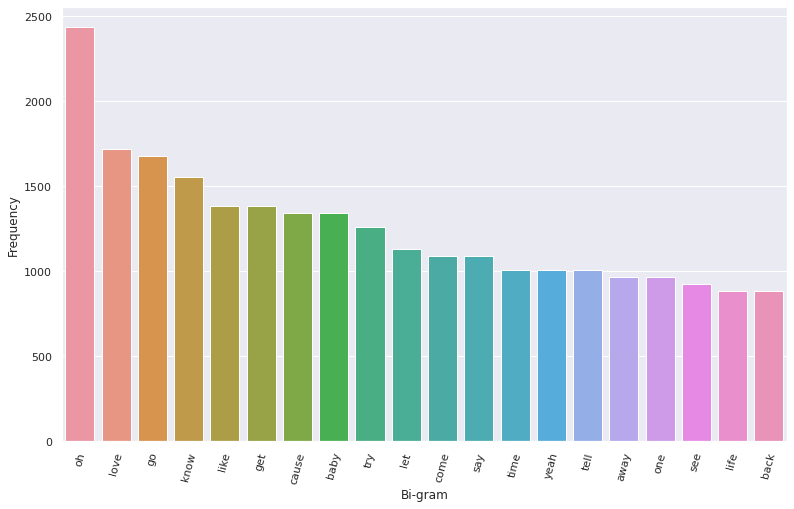

In [94]:
#View most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(stop_words = stop_words, ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                 vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1],
                       reverse = True)
    return words_freq[:n]
    
#Convert most freq words to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Frequency"]
print(top2_df)

#Barplot of most freq words
import seaborn as sns
sns.set(rc = {'figure.figsize':(13,8)})
h = sns.barplot(x="Bi-gram", y="Frequency", data = top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation = 75)

#### Trigrams

             Tri-gram  Frequency
0     cause get cause       1344
1          oh love oh       1176
2        love oh love       1050
3    always good time        966
4            oh oh oh        924
5          whoa oh oh        882
6        bet life bet        840
7      back come back        840
8      go stop rockin        840
9    stop rockin tune        840
10  rockin tune cause        840
11           go go go        840
12     come back come        756
13        try try try        714
14      life bet life        672
15     tune cause get        672
16      get cause get        672
17       get cause go        672
18      cause go stop        672
19      gotta get try        630


[Text(0, 0, 'oh'),
 Text(1, 0, 'love'),
 Text(2, 0, 'go'),
 Text(3, 0, 'know'),
 Text(4, 0, 'like'),
 Text(5, 0, 'get'),
 Text(6, 0, 'cause'),
 Text(7, 0, 'baby'),
 Text(8, 0, 'try'),
 Text(9, 0, 'let'),
 Text(10, 0, 'come'),
 Text(11, 0, 'say'),
 Text(12, 0, 'time'),
 Text(13, 0, 'yeah'),
 Text(14, 0, 'tell'),
 Text(15, 0, 'away'),
 Text(16, 0, 'one'),
 Text(17, 0, 'see'),
 Text(18, 0, 'life'),
 Text(19, 0, 'back')]

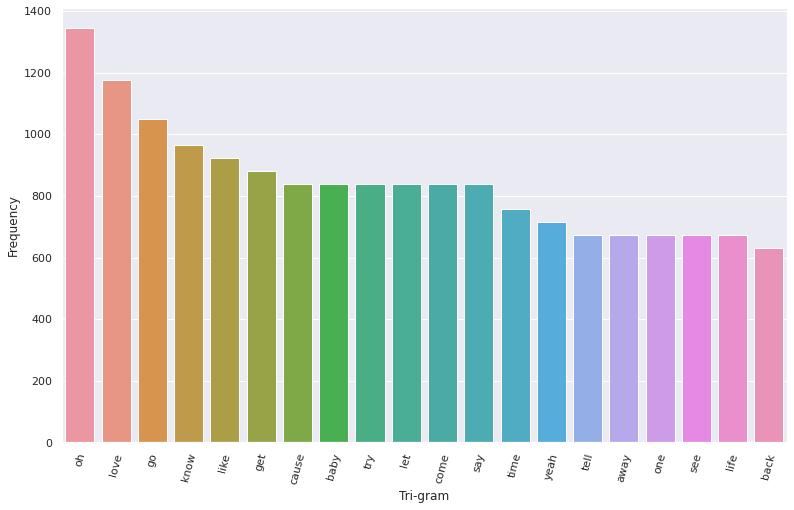

In [95]:
#View most frequently occuring trigrams
def get_top_n3_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop_words, ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                 vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1],
                       reverse = True)
    return words_freq[:n]
    
#Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Frequency"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc = {'figure.figsize':(13,8)})
j = sns.barplot(x="Tri-gram", y="Frequency", data = top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation = 75)